In [37]:
import scipy.io as sio
import numpy as np
import sys
import os
import re
from matplotlib import pyplot as plt

In [38]:
print sys.byteorder

little


In [39]:
path = '/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/test_cases'
file_list = os.listdir(path)    #This is a list of all of the .mat files

In [40]:
edit_path = path + '/' + file_list[0]

In [41]:
print edit_path

/Users/joseferpaz/Documents/Vanderbilt Internship/fw_i3cm1i_3pluspoint_berglund_QPBO/test_cases/01.mat


In [50]:
mat = sio.loadmat(edit_path)
num_array = mat['imDataParams']['images']

image_array = num_array[0][0]

print image_array.dtype
print image_array.shape


complex64
(192, 192, 4, 1, 6)


In [43]:
image_array_real = np.real(image_array)
print image_array_real.dtype
print image_array_real.shape

float32
(192, 192, 4, 1, 6)


In [44]:
maxval =np.amax(np.real(image_array_real))
print maxval

4.69632e+07


In [45]:
image_array_real_int16 = ( (2**14-1) * image_array_real/maxval).astype('int16')
print image_array_real_int16.dtype
print image_array_real_int16.shape

int16
(192, 192, 4, 1, 6)


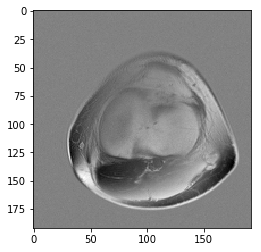

In [46]:
plt.imshow(image_array_real_int16[:,:,0,0,0], interpolation='nearest', cmap='gray')
plt.show()

In [49]:
image_array_real_int16_byteswap = image_array_real_int16.byteswap()
image_array_real_int16_byteswap[:,:,0,0,0].tofile('/Users/joseferpaz/Documents/image_array_real_floar32_192_192_0_0_0.raw')